This post is structured as follows.

    Set up the Code
    Download the Data
    Convert the Annotations into the YOLO v5 Format
        YOLO v5 Annotation Format
        Testing the annotations
        Partition the Dataset
    Training Options
        Data Config File
        Hyper-parameter Config File
        Custom Network Architecture
        Train the Model
    Inference
        Computing the mAP on test dataset
Reference : 
https://blog.paperspace.com/train-yolov5-custom-data/

1) Folder structre for running the script should be 

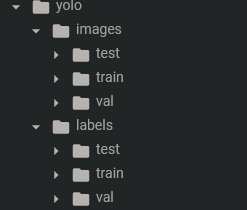


2)clone yolov5 from following link git clone 
https://github.com/ultralytics/yolov5


3)After cloning we need create following 3 YAML file in data folder of yolov5 repo

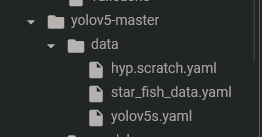



4) data/Data.yaml file contains following 

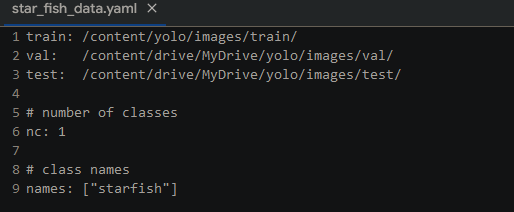


5) define hyperparametres to be used in data/hyp.scratch.yaml file

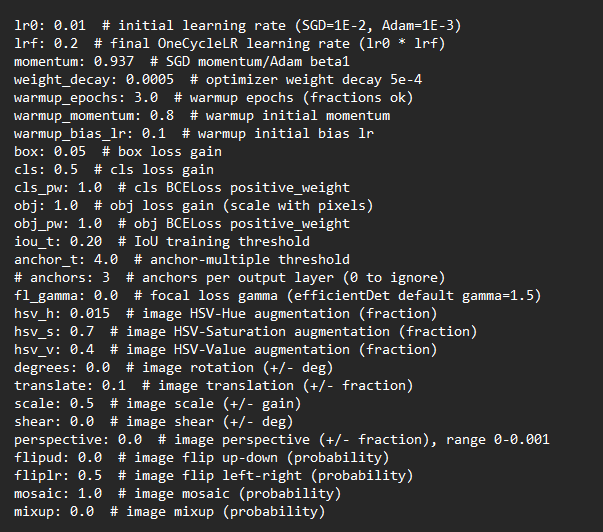

6) create custom network architecture in data/yolov5s.yaml file

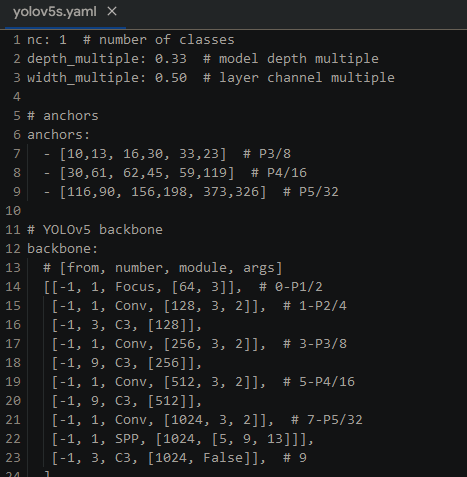


**Training model by running train.py file**

In [ ]:
!python /content/yolo/yolov5-master/train.py --img 640 --cfg /content/yolo/yolov5-master/data/yolov5s.yaml --hyp /content/yolo/yolov5-master/data/hyp.scratch.yaml --batch 32 --epochs 100 --data /content/yolo/yolov5-master/data/star_fish_data.yaml --weights yolov5s.pt --workers 24 --name yolo_road_det

train: weights=yolov5s.pt, cfg=/content/yolo/yolov5-master/data/yolov5s.yaml, data=/content/yolo/yolov5-master/data/star_fish_data.yaml, hyp=/content/yolo/yolov5-master/data/hyp.scratch.yaml, epochs=100, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=yolo/yolov5-master/runs/train, name=yolo_road_det, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2022-7-18 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, war

Detecting on test data using trained model 

In [ ]:
!python /content/drive/MyDrive/yolo/yolov5-master/detect.py --source ../content/drive/MyDrive/yolo/images/test --weights /content/drive/MyDrive/yolo/yolov5-master/runs/train/yolo_road_det6/weights/best.pt --conf 0.25 --name yolo_road_det

detect: weights=['/content/drive/MyDrive/yolo/yolov5-master/runs/train/yolo_road_det6/weights/best.pt'], source=../content/drive/MyDrive/yolo/images/test, data=drive/MyDrive/yolo/yolov5-master/data/star_fish_data.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/yolo/yolov5-master/runs/detect, name=yolo_road_det, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 2022-7-20 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 224 layers, 7053910 parameters, 0 gradients
image 1/100 /content/drive/MyDrive/yolo/images/test/1002.jpg: 384x640 1 starfish, Done. (0.013s)
image 2/100 /content/drive/MyDrive/yolo/images/test/1005.jpg: 384x640 1 starfish, Done. (0.011s)
image 3/100 /content/drive/

In [ ]:
!python /content/drive/MyDrive/yolo/yolov5-master/val.py --weights /content/drive/MyDrive/yolo/yolov5-master/runs/train/yolo_road_det6/weights/best.pt --data /content/drive/MyDrive/yolo/yolov5-master/data/star_fish_data.yaml --task test --name yolo_det

val: data=/content/drive/MyDrive/yolo/yolov5-master/data/star_fish_data.yaml, weights=['/content/drive/MyDrive/yolo/yolov5-master/runs/train/yolo_road_det6/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=drive/MyDrive/yolo/yolov5-master/runs/val, name=yolo_det, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 2022-7-20 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 224 layers, 7053910 parameters, 0 gradients
test: Scanning '/content/drive/MyDrive/yolo/labels/test' images and labels...100 found, 0 missing, 0 empty, 0 corrupt: 100% 100/100 [01:23<00:00,  1.20it/s]
test: New cache created: /content/drive/MyDrive/yolo/labels/test.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 4/4 [00:05<00:00,  1.26s/it]
    